# Proyecto Final by Enrique Hernandez Laredo

A partir de una base de datos publica (1) que contiene el registro de datos personales (edad, sexo, zona residencial, número de hijos), y datos relativos a la salud (índice de masa corporal, consumo de tabaco) se postula calcular los gastos médicos individuales facturados por un seguro de salud.

Se plantea realizar un análisis exploratorio de los datos para entender que variables influyen en los gastos médicos generados por los clientes asegurados. 
Además, se propone generar un modelo de regresión basado en algoritmos de machine learning (ML) para predecir los gastos de servicios de salud de los clientes a partir de sus datos personales y datos relativos a la salud.

Se utilizó la base de datos publica “Medical Cost Personal Datasets - Insurance Forecast by using Linear Regression” contenida en el repositorio Kaggle (1).

REFERENCIAS
1. 	Choi M. Medical Cost Personal Datasets | Kaggle [Internet]. 2017 [cited 2021 Dec 5]. Available from: https://www.kaggle.com/mirichoi0218/insurance


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Comprobando si existen valores nulos:

In [8]:
'''def func(x):
    if x < 18.5:
        return 0
    if  x >= 18.5 or x <= 24.9:
        return 1
    if  x >= 25.0 or x <= 29.9:
        return 2
    if x <= 30:
        return 3

df["BMI_CDC"]=df["bmi"].apply(func)

BMI_CDC_c=df.pop('BMI_CDC')
df.insert(6,'BMI_CDC',BMI_CDC_c)
df'''

'def func(x):\n    if x < 18.5:\n        return 0\n    if  x >= 18.5 or x <= 24.9:\n        return 1\n    if  x >= 25.0 or x <= 29.9:\n        return 2\n    if x <= 30:\n        return 3\n\ndf["BMI_CDC"]=df["bmi"].apply(func)\n\nBMI_CDC_c=df.pop(\'BMI_CDC\')\ndf.insert(6,\'BMI_CDC\',BMI_CDC_c)\ndf'

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Analisis exploratorio de los datos:

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
print("Porcentaje valores de la caracteristica Sex")
df.sex.value_counts()*(100/1338)

Porcentaje valores de la caracteristica Sex


male      50.523169
female    49.476831
Name: sex, dtype: float64

In [12]:
print("Porcentaje valores de la caracteristica children")
df.children.value_counts()*(100/1338)

Porcentaje valores de la caracteristica children


0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

In [13]:
print("Porcentaje valores de la caracteristica smoker")
df.smoker.value_counts()*(100/1338)

Porcentaje valores de la caracteristica smoker


no     79.521674
yes    20.478326
Name: smoker, dtype: float64

In [14]:
print("Porcentaje valores de la caracteristica region")
df.region.value_counts()*(100/1338)

Porcentaje valores de la caracteristica region


southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64

In [15]:
#df.pop('children')
cor=df.corr()
cor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Visualización de los datos:

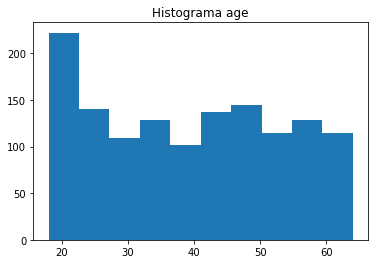

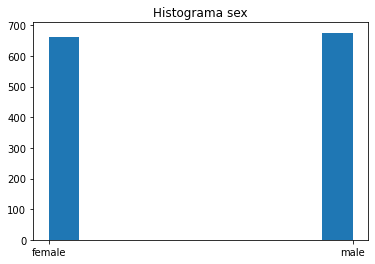

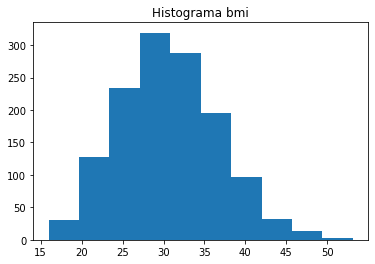

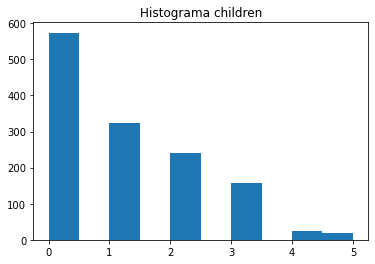

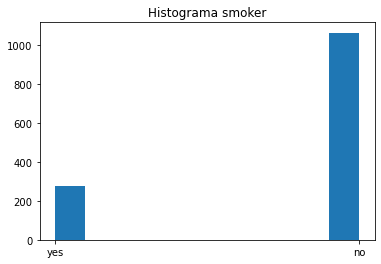

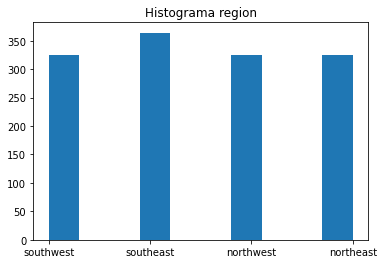

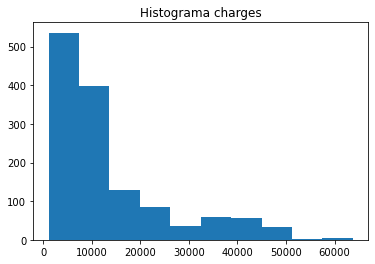

In [16]:
for col in df.columns:
    plt.hist(df[col])
    plt.title("Histograma " + col )
    plt.show()

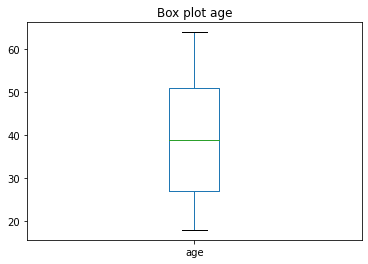

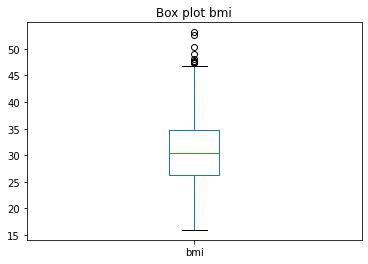

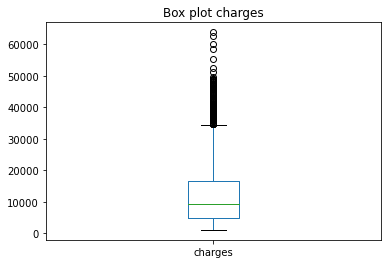

In [17]:
df.age.plot(kind = "box",)
plt.title("Box plot age")
plt.show()

df.bmi.plot(kind = "box",)
plt.title("Box plot bmi")
plt.show()

df.charges.plot(kind = "box",)
plt.title("Box plot charges")
plt.show()

In [18]:
df_n=df.copy()

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
import pylab

def qq_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()

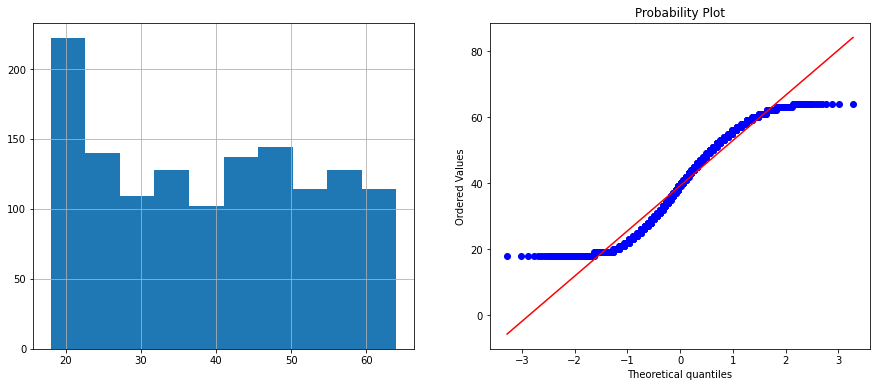

Optimal lambda:  0.6231934135811849 para  age


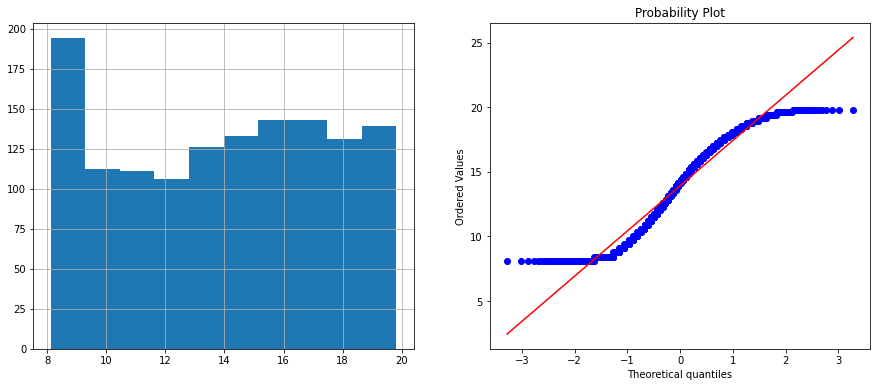

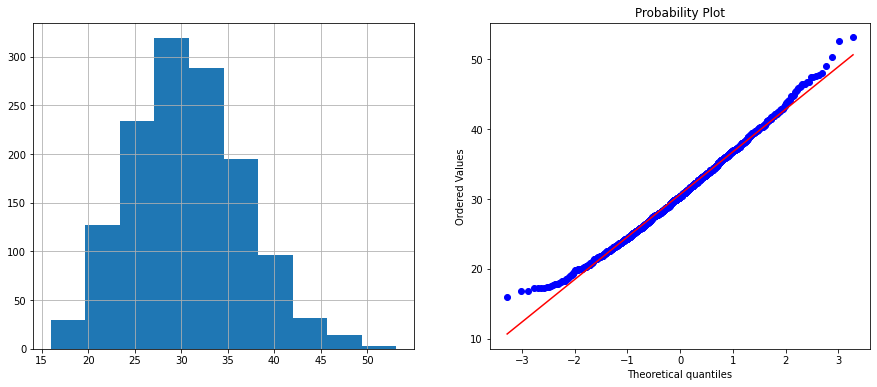

Optimal lambda:  0.46059764800652364 para  bmi


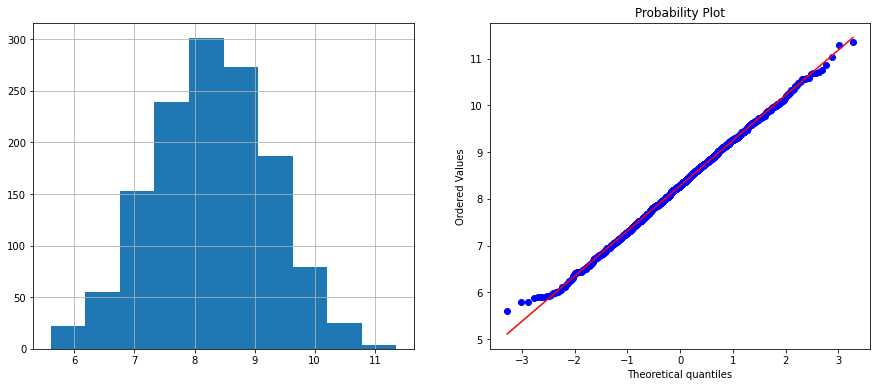

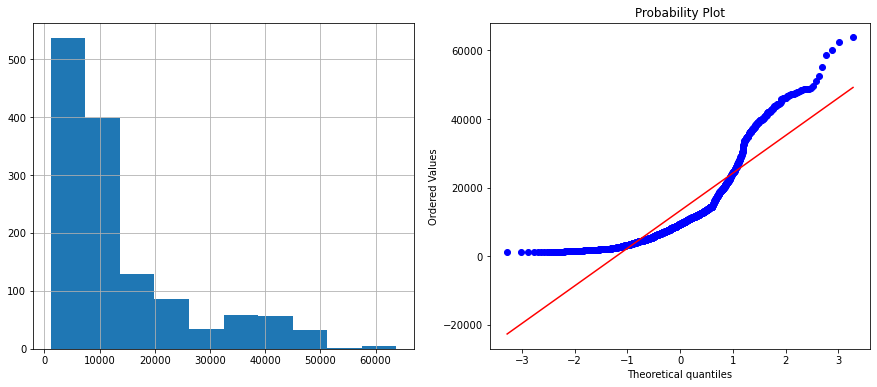

Optimal lambda:  0.043649053770664956 para  charges


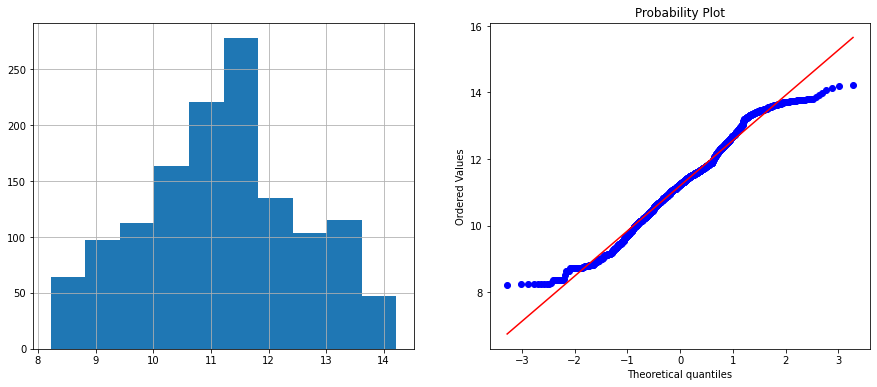

In [20]:
# BoxCos Transformation
coll=["age","bmi","charges"]
for col in coll:
    df_n[col], param = stats.boxcox(df_n[col])
    qq_plots(df,col)
    print("Optimal lambda: ", param, "para ", col)
    qq_plots(df_n, col)
    
    


 age


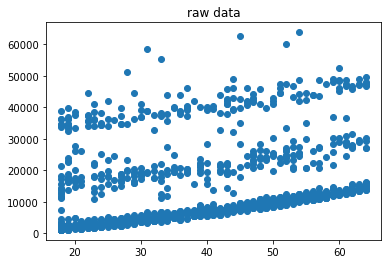

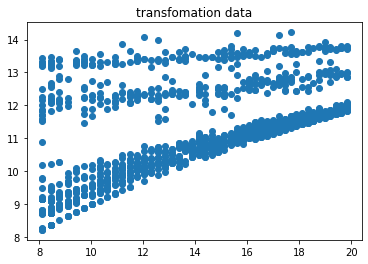


 sex


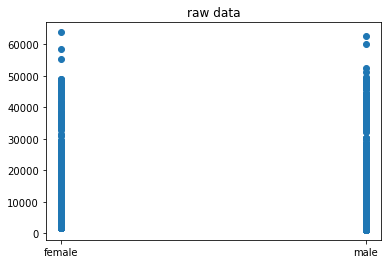

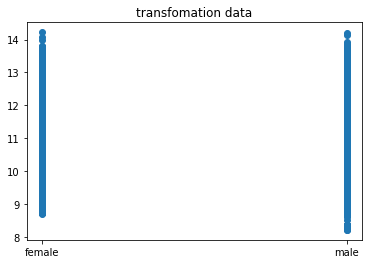


 bmi


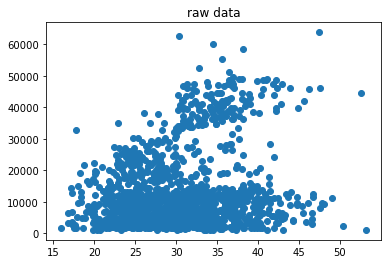

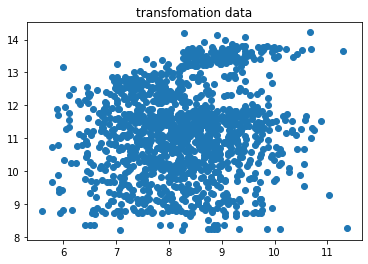


 children


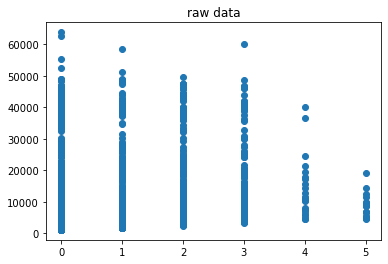

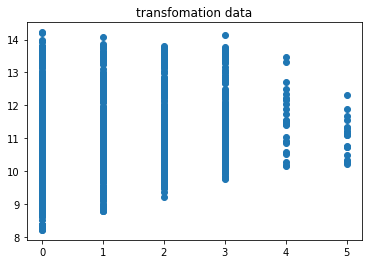


 smoker


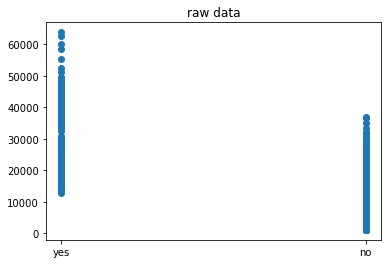

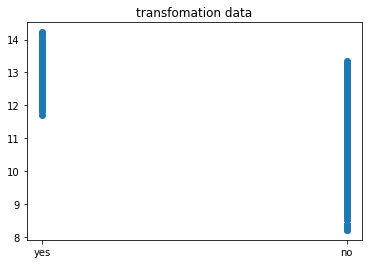


 region


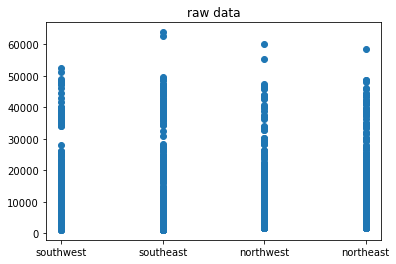

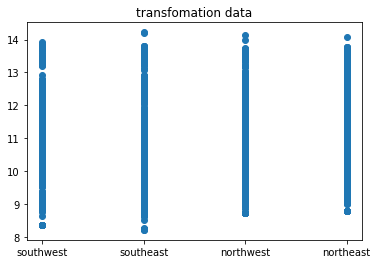

In [21]:
for col in df_n.columns[:-1]:
    plt.scatter(df[col],df.charges)
    print("\n", col)
    plt.title("raw data")
    plt.show()
    plt.scatter(df_n[col],df_n.charges)
    plt.title("transfomation data")
    plt.show()

In [22]:
from scipy.stats import normaltest # prueba de normalidad

In [23]:
print ('Raw data')
for col in cor.columns:
    print('Test normalidad para la variable ' + col)
    S,p= normaltest(df[col])
    alfa=0.05
    print('p = {:g}'.format(p))
    if p<alfa:
        print('Distribución distinta a la normal \n')
    else:
        print('Distribución normal \n')
print ('Box-cox data')        
for col in cor.columns:
    print('Test normalidad para la variable ' + col)
    S,p= normaltest(df_n[col])
    alfa=0.05
    print('p = {:g}'.format(p))
    if p<alfa:
        print('Distribución distinta a la normal \n')
    else:
        print('Distribución normal \n')       

Raw data
Test normalidad para la variable age
p = 0
Distribución distinta a la normal 

Test normalidad para la variable bmi
p = 0.000152138
Distribución distinta a la normal 

Test normalidad para la variable children
p = 8.45789e-33
Distribución distinta a la normal 

Test normalidad para la variable charges
p = 7.01981e-74
Distribución distinta a la normal 

Box-cox data
Test normalidad para la variable age
p = 0
Distribución distinta a la normal 

Test normalidad para la variable bmi
p = 0.23484
Distribución normal 

Test normalidad para la variable children
p = 8.45789e-33
Distribución distinta a la normal 

Test normalidad para la variable charges
p = 1.52496e-12
Distribución distinta a la normal 



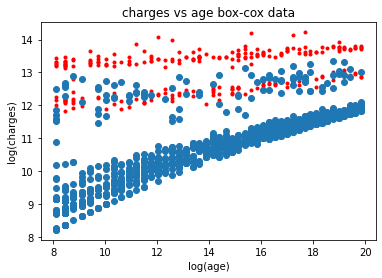

In [24]:
plt.scatter(df_n['age'][df_n['smoker']=='yes'],df_n['charges'][df_n['smoker']=='yes'],c="r", marker=".")
plt.scatter(df_n['age'][df_n['smoker']=='no'],df_n['charges'][df_n['smoker']=='no'])
plt.gca().update(dict(title='charges vs age box-cox data',xlabel='log(age)',ylabel='log(charges)'))

plt.show()

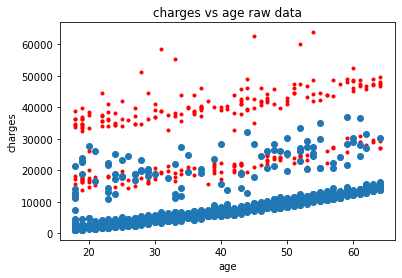

In [25]:
plt.scatter(df['age'][df_n['smoker']=='yes'],df['charges'][df['smoker']=='yes'],c="r", marker=".")
plt.scatter(df['age'][df_n['smoker']=='no'],df['charges'][df['smoker']=='no'])
plt.gca().update(dict(title='charges vs age raw data',xlabel='age',ylabel='charges'))
plt.show()

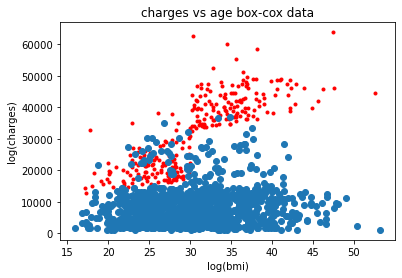

In [26]:
plt.scatter(df['bmi'][df_n['smoker']=='yes'],df['charges'][df['smoker']=='yes'],c="r", marker=".")
plt.scatter(df['bmi'][df_n['smoker']=='no'],df['charges'][df['smoker']=='no'])
plt.gca().update(dict(title='charges vs age box-cox data',xlabel='log(bmi)',ylabel='log(charges)'))
plt.show()

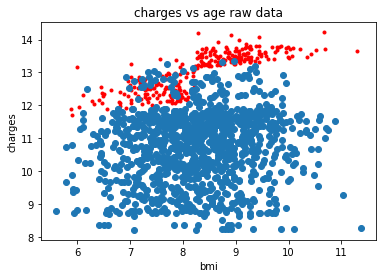

In [27]:
plt.scatter(df_n['bmi'][df['smoker']=='yes'],df_n['charges'][df['smoker']=='yes'],c="r", marker=".")
plt.scatter(df_n['bmi'][df['smoker']=='no'],df_n['charges'][df['smoker']=='no'])
plt.gca().update(dict(title='charges vs age raw data',xlabel='bmi',ylabel='charges'))
plt.show()

In [28]:
df_smoker=pd.DataFrame(data=df,index=df[df['smoker']=='yes'].index)
df_smoker_n=pd.DataFrame(data=df_n,index=df_n[df_n['smoker']=='yes'].index)

In [29]:
df_nosmoker=pd.DataFrame(data=df,index=df[df['smoker']=='no'].index)
df_nosmoker_n=pd.DataFrame(data=df_n,index=df_n[df_n['smoker']=='no'].index)

In [30]:
df_nosmoker.corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [31]:
df_smoker.corr()

,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


## Regresión lineal modelo general

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(pd.DataFrame(df.iloc[:,:-1])), pd.DataFrame(df["charges"]), test_size=.2, random_state=2)

lin_model_1 = LinearRegression().fit(X_train, Y_train)

target_train_predict_1 = lin_model_1.predict(X_train)
target_test_predict_1 = lin_model_1.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_train_1 = r2_score(Y_train, target_train_predict_1)
r2_test_1 = r2_score(Y_test, target_test_predict_1)

print("Modelo general raw data")
print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_1))
print("R² para los datos de prueba:        {:.4f}".format(r2_test_1))

Modelo general raw data
R² para los datos de entrenamiento: 0.7520
R² para los datos de prueba:        0.7449


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(pd.DataFrame(df_n.iloc[:,:-1])), pd.DataFrame(df_n["charges"]), test_size=.2, random_state=2)

lin_model_1 = LinearRegression().fit(X_train, Y_train)

target_train_predict_1 = lin_model_1.predict(X_train)
target_test_predict_1 = lin_model_1.predict(X_test)

## Regresar a la escala orginal
target_train_predict_1=((target_train_predict_1*0.043649053770664956)+1)**(1/0.043649053770664956)
target_test_predict_1=((target_test_predict_1*0.043649053770664956)+1)**(1/0.043649053770664956)
Y_train=((Y_train*0.043649053770664956)+1)**(1/0.043649053770664956)
Y_test=((Y_test*0.043649053770664956)+1)**(1/0.043649053770664956)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

r2_train_1 = r2_score(Y_train, target_train_predict_1)
r2_test_1 = r2_score(Y_test, target_test_predict_1)

print("Modelo general normalization data")
print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_1))
print("R² para los datos de prueba:        {:.4f}".format(r2_test_1))

from sklearn.metrics import mean_squared_error, mean_absolute_error


mae_train_ensable = mean_absolute_error(Y_train, target_train_predict_1)
mae_test_ensable = mean_absolute_error(Y_test, target_test_predict_1)

print("\nMAE para los datos de entrenamiento: {:.4f}".format(mae_train_ensable))
print("MAE para los datos de prueba:        {:.4f}".format(mae_test_ensable))

rmse_train_ensable = (np.sqrt(mean_squared_error(Y_train, target_train_predict_1)))
rmse_test_ensable = (np.sqrt(mean_squared_error(Y_test, target_test_predict_1)))

print("\nRMSE para los datos de entrenamiento: {:.4f}".format(rmse_train_ensable))
print("RMSE para los datos de prueba:        {:.4f}".format(rmse_test_ensable))

MAPE_train_ensable=mean_absolute_percentage_error(Y_train, target_train_predict_1)
MAPE_test_ensable=mean_absolute_percentage_error(Y_test, target_test_predict_1)

print("\nMAPE para los datos de entrenamiento: {:.4f}".format(MAPE_train_ensable))
print("MAPE para los datos de prueba:        {:.4f}".format(MAPE_test_ensable))


y_gorro_train=pd.DataFrame(data=target_train_predict_1)
y_gorro_test=pd.DataFrame(data=target_test_predict_1)
MPE_train_ensable=sum((Y_train.to_numpy()-y_gorro_train.to_numpy())/(Y_train.to_numpy()))*(1/Y_train.to_numpy().size)*100
MPE_test_ensable=sum((Y_test.to_numpy()-y_gorro_test.to_numpy())/(Y_test.to_numpy()))*(1/Y_test.to_numpy().size)*100


print("\nMAPE para los datos de entrenamiento:", (MPE_train_ensable))
print("MAPE para los datos de prueba:        ",  (MPE_test_ensable))

Modelo general normalization data
R² para los datos de entrenamiento: 0.6022
R² para los datos de prueba:        0.6203

MAE para los datos de entrenamiento: 4033.9212
MAE para los datos de prueba:        3857.7767

RMSE para los datos de entrenamiento: 7609.9139
RMSE para los datos de prueba:        7551.2550

MAPE para los datos de entrenamiento: 0.2655
MAPE para los datos de prueba:        0.2857

MAPE para los datos de entrenamiento: [-8.39577772]
MAPE para los datos de prueba:         [-11.68602316]


In [35]:
lin_model_1.coef_

array([[ 0.19350766,  0.12594512,  0.14292543,  0.05314719, -0.05314719,
        -1.16074156,  1.16074156,  0.13214224,  0.01636867, -0.09184089,
        -0.05667002]])

In [36]:
lin_model_1.intercept_

array([7.99936976])

**Se toma la desición de modelar a partir de los datos normalizados**

## Regresión lineal modelo por grupos

### Modelo fumadores

In [37]:
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(pd.get_dummies(pd.DataFrame(df_smoker_n.iloc[:,:-1])), pd.DataFrame(df_smoker_n["charges"]), test_size=.2, random_state=2)

lin_model_2 = LinearRegression().fit(X_train_s, Y_train_s)

target_train_predict_2 = lin_model_2.predict(X_train_s)
target_test_predict_2 = lin_model_2.predict(X_test_s)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_train_2 = r2_score(Y_train_s, target_train_predict_2)
r2_test_2 = r2_score(Y_test_s, target_test_predict_2)

print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_2))
print("R² para los datos de prueba:        {:.4f}".format(r2_train_2))

R² para los datos de entrenamiento: 0.7546
R² para los datos de prueba:        0.7546


##### Entendimiento modelo fumadores

In [38]:
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(pd.DataFrame(df_smoker_n.iloc[:,0]), pd.DataFrame(df_smoker_n["charges"]), test_size=.2, random_state=2)

lin_model_2 = LinearRegression().fit(X_train_s, Y_train_s)

target_train_predict_2 = lin_model_2.predict(X_train_s)
target_test_predict_2 = lin_model_2.predict(X_test_s)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_train_2 = r2_score(Y_train_s, target_train_predict_2)
r2_test_2 = r2_score(Y_test_s, target_test_predict_2)
print("Modelo fumadores raw data")
print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_2))
print("R² para los datos de prueba:        {:.4f}".format(r2_test_2))

Modelo fumadores raw data
R² para los datos de entrenamiento: 0.1121
R² para los datos de prueba:        0.1889


Text(0.5, 1.0, 'Modelo fumadores normal target')

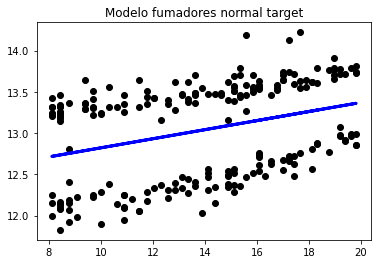

In [39]:
plt.scatter(X_train_s, Y_train_s, color="black")
plt.plot(X_train_s, target_train_predict_2, color="blue", linewidth=3)
plt.title("Modelo fumadores normal target")

### Modelo no fumadores

In [40]:
X_train_ns, X_test_ns, Y_train_ns, Y_test_ns = train_test_split(pd.get_dummies(df_nosmoker_n.iloc[:,:-1]), pd.DataFrame(df_nosmoker_n["charges"]), test_size=.2, random_state=42)

lin_model_3 = LinearRegression().fit(X_train_ns, Y_train_ns)

target_train_predict_3 = lin_model_3.predict(X_train_ns)
target_test_predict_3 = lin_model_3.predict(X_test_ns)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_train_3 = r2_score(Y_train_ns,target_train_predict_3)
r2_test_3 = r2_score(Y_test_ns,target_test_predict_3)

print("Modelo no fumadores raw data")
print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_3))
print("R² para los datos de prueba:        {:.4f}".format(r2_test_3))

Modelo no fumadores raw data
R² para los datos de entrenamiento: 0.6765
R² para los datos de prueba:        0.7238


##### Entendimiento no modelo fumadores

In [41]:
X_train_ns, X_test_ns, Y_train_ns, Y_test_ns = train_test_split(pd.DataFrame(df_nosmoker_n.age), pd.DataFrame(df_nosmoker_n["charges"]), test_size=.2, random_state=42)

lin_model_3 = LinearRegression().fit(X_train_ns, Y_train_ns)

target_train_predict_3 = lin_model_3.predict(X_train_ns)
target_test_predict_3 = lin_model_3.predict(X_test_ns)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_train_3 = r2_score(Y_train_ns,target_train_predict_3)
r2_test_3 = r2_score(Y_test_ns,target_test_predict_3)

print("Modelo no fumadores raw data")
print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_3))
print("R² para los datos de prueba:        {:.4f}".format(r2_test_3))

Modelo no fumadores raw data
R² para los datos de entrenamiento: 0.6281
R² para los datos de prueba:        0.6682


Text(0.5, 1.0, 'Modelo no fumadores normal target')

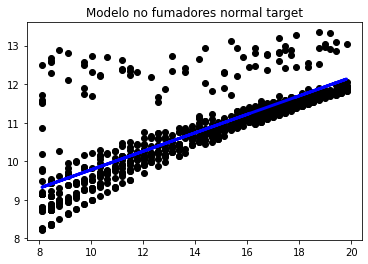

In [42]:
plt.scatter(X_train_ns, Y_train_ns, color="black")
plt.plot(X_train_ns, target_train_predict_3, color="blue", linewidth=3)
plt.title("Modelo no fumadores normal target")

### Entendimiento modelo por grupos

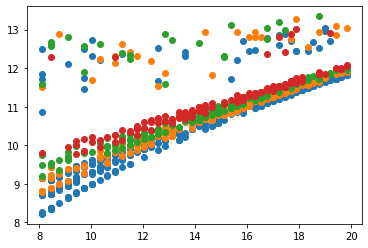

In [43]:
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["children"]==0],df_nosmoker_n["charges"][df_nosmoker_n["children"]==0])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["children"]==1],df_nosmoker_n["charges"][df_nosmoker_n["children"]==1])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["children"]==2],df_nosmoker_n["charges"][df_nosmoker_n["children"]==2])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["children"]==3],df_nosmoker_n["charges"][df_nosmoker_n["children"]==3])

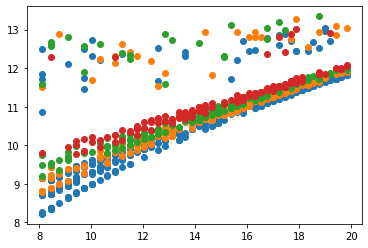

In [44]:
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["children"]==0],df_nosmoker_n["charges"][df_nosmoker_n["children"]==0])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["children"]==1],df_nosmoker_n["charges"][df_nosmoker_n["children"]==1])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["children"]==2],df_nosmoker_n["charges"][df_nosmoker_n["children"]==2])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["children"]==3],df_nosmoker_n["charges"][df_nosmoker_n["children"]==3])

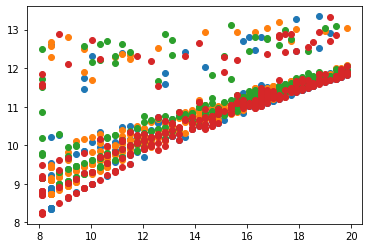

In [45]:
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["region"]=='southwest'],df_nosmoker_n["charges"][df_nosmoker_n["region"]=='southwest'])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["region"]=='northwest'],df_nosmoker_n["charges"][df_nosmoker_n["region"]=='northwest'])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["region"]=='northeast'],df_nosmoker_n["charges"][df_nosmoker_n["region"]=='northeast'])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["region"]=='southeast'],df_nosmoker_n["charges"][df_nosmoker_n["region"]=='southeast'])

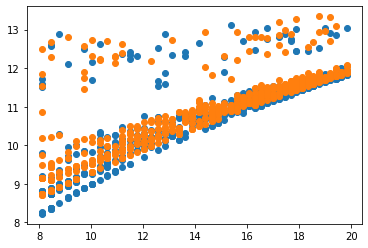

In [46]:
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["sex"]=="male"],df_nosmoker_n["charges"][df_nosmoker_n["sex"]=="male"])
plt.scatter(df_nosmoker_n["age"][df_nosmoker_n["sex"]=="female"],df_nosmoker_n["charges"][df_nosmoker_n["sex"]=="female"])

**Posterior a enterder como se relacionan las varibales predictoras vs el target se procede a mejorar el rendimiento del regresor mediante un algoritmo más robusto**

## Gradient Boosting regression modelo general

**A pesar que los datos normalizados mostraron mayor rendimiento en el modelo de regresión lineal, se propone trabajar con los datos no normalizados ya que el algortimo Gradient Boosting regression es insensibles a cambios de escala o normalización, de modo que se evita el cambio de escala en la variable charges**

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

#raw data
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(pd.DataFrame(df.iloc[:,:-1])), pd.DataFrame(df["charges"]), test_size=.2, random_state=2)
#est_g = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train,Y_train.values.ravel())
est_g = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2,max_features='auto',min_samples_leaf=1,min_samples_split=2, random_state=0).fit(X_train,Y_train.values.ravel())


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_test_es = r2_score(Y_test,est_g.predict(X_test))
r2_train_es = r2_score(Y_train,est_g.predict(X_train))


print("Gradient Boosting raw data")
print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_es))
print("R² para los datos de prueba:        {:.4f}".format(r2_test_es))

from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

mae_train_ = mean_absolute_error(Y_train, est_g.predict(X_train))
mae_test_ = mean_absolute_error(Y_test, est_g.predict(X_test))

print("\nMAE para los datos de entrenamiento: {:.4f}".format(mae_train_))
print("MAE para los datos de prueba:        {:.4f}".format(mae_test_))

rmse_train_ = (np.sqrt(mean_squared_error(Y_train, est_g.predict(X_train))))
rmse_test_ = (np.sqrt(mean_squared_error(Y_test,  est_g.predict(X_test))))

print("\nRMSE para los datos de entrenamiento: {:.4f}".format(rmse_train_))
print("RMSE para los datos de prueba:        {:.4f}".format(rmse_test_))

MAPE_train_=mean_absolute_percentage_error(Y_train, est_g.predict(X_train))
MAPE_test_=mean_absolute_percentage_error(Y_test, est_g.predict(X_test))

print("\nMAPE para los datos de entrenamiento: {:.4f}".format(MAPE_train_))
print("MAPE para los datos de prueba:        {:.4f}".format(MAPE_test_))

y_gorro_train=pd.DataFrame(data=est_g.predict(X_train))
y_gorro_test=pd.DataFrame(data=est_g.predict(X_test))
MPE_train_=sum((Y_train.to_numpy()-y_gorro_train.to_numpy())/(Y_train.to_numpy()))*(1/Y_train.to_numpy().size)*100
MPE_test_=sum((Y_test.to_numpy()-y_gorro_test.to_numpy())/(Y_test.to_numpy()))*(1/Y_test.to_numpy().size)*100


print("\nMPE para los datos de entrenamiento:", (MPE_train_))
print("MPE para los datos de prueba:        ",  (MPE_test_))


Gradient Boosting raw data
R² para los datos de entrenamiento: 0.8790
R² para los datos de prueba:        0.8702

MAE para los datos de entrenamiento: 2313.8296
MAE para los datos de prueba:        2413.9343

RMSE para los datos de entrenamiento: 4197.5102
RMSE para los datos de prueba:        4414.3822

MAPE para los datos de entrenamiento: 0.2695
MAPE para los datos de prueba:        0.3161

MPE para los datos de entrenamiento: [-17.06905043]
MPE para los datos de prueba:         [-22.13788324]


##  Gradient Boosting regression modelo fumadores

In [ ]:
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(pd.get_dummies(pd.DataFrame(df_smoker.iloc[:,:-1])), pd.DataFrame(df_smoker["charges"]), test_size=.2, random_state=2)

#est_s = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train_s,Y_train_s.values.ravel())
est_s = GradientBoostingRegressor(n_estimators=162, learning_rate=0.1, max_depth=2,max_features='sqrt',min_samples_leaf= 1,min_samples_split= 5, random_state=0).fit(X_train_s,Y_train_s.values.ravel())
'''
{'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 162}
'''


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_test_es_s = r2_score(Y_test_s,est_s.predict(X_test_s))
r2_train_es_s = r2_score(Y_train_s,est_s.predict(X_train_s))

print("Modelo no fumadores raw data")
print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_es_s))
print("R² para los datos de prueba:        {:.4f}".format(r2_test_es_s))


##  Ensable de modelos general y modelo fumador Gradient Boosting regression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(pd.DataFrame(df.iloc[:,:-1])), pd.DataFrame(df["charges"]), test_size=.2, random_state=2)

y_predicion_s_train=est_s.predict(pd.concat([X_train.iloc[:,:5],X_train.iloc[:,6:]],axis=1))
y_predicion_g_train=est_g.predict(X_train)
y_predicion_train = np.zeros((Y_train.shape[0],1 ))

y_predicion_s_test=est_s.predict(pd.concat([X_test.iloc[:,:5],X_test.iloc[:,6:]],axis=1))
y_predicion_g_test=est_g.predict(X_test)
y_predicion_test = np.zeros((Y_test.shape[0],1 ))

for i in range(X_train.shape[0]):
    if X_train.iloc[i,6]==1: #smoker yes
        y_predicion_train[i]=y_predicion_s_train[i]
    else:#smoker no
         y_predicion_train[i]=y_predicion_g_train[i]


for i in range(X_test.shape[0]):
    if X_test.iloc[i,6]==1: #smoker yes
        y_predicion_test[i]=y_predicion_s_test[i]
    else:#smoker no
         y_predicion_test[i]=y_predicion_g_test[i]

            
r2_test_ensable = r2_score(Y_test,y_predicion_test)
r2_train_ensable = r2_score(Y_train,y_predicion_train)


print("Modelo ensable raw data")
print("R² para los datos de entrenamiento: {:.4f}".format(r2_train_ensable))
print("R² para los datos de prueba:        {:.4f}".format(r2_test_ensable))

from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_train_ensable = mean_absolute_error(Y_train, y_predicion_train)
mae_test_ensable = mean_absolute_error(Y_test, y_predicion_test)

print("\nMAE para los datos de entrenamiento: {:.4f}".format(mae_train_ensable))
print("MAE para los datos de prueba:        {:.4f}".format(mae_test_ensable))

rmse_train_ensable = (np.sqrt(mean_squared_error(Y_train, y_predicion_train)))
rmse_test_ensable = (np.sqrt(mean_squared_error(Y_test, y_predicion_test)))

print("\nRMSE para los datos de entrenamiento: {:.4f}".format(rmse_train_ensable))
print("RMSE para los datos de prueba:        {:.4f}".format(rmse_test_ensable))

MAPE_train_ensable=mean_absolute_percentage_error(Y_train, y_predicion_train)
MAPE_test_ensable=mean_absolute_percentage_error(Y_test, y_predicion_test)

print("\nMAPE para los datos de entrenamiento: {:.4f}".format(MAPE_train_ensable))
print("MAPE para los datos de prueba:        {:.4f}".format(MAPE_test_ensable))


y_gorro_train=pd.DataFrame(data=y_predicion_train)
y_gorro_test=pd.DataFrame(data=y_predicion_test)
MPE_train_ensable=sum((Y_train.to_numpy()-y_gorro_train.to_numpy())/(Y_train.to_numpy()))*(1/Y_train.to_numpy().size)*100
MPE_test_ensable=sum((Y_test.to_numpy()-y_gorro_test.to_numpy())/(Y_test.to_numpy()))*(1/Y_test.to_numpy().size)*100


print("\nMAPE para los datos de entrenamiento:", (MPE_train_ensable))
print("MAPE para los datos de prueba:        ",  (MPE_test_ensable))

### Optimización Gradient Boosting regression modelo general

In [ ]:
n_estimators=[int(x) for  x in np.linspace(start=100, stop=1000, num=30)]
max_features=['auto', 'sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]

param_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

rf_model=GradientBoostingRegressor()

from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator = rf_model, param_grid= param_grid,verbose=2, cv=3, n_jobs=-1)

X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(pd.DataFrame(df.iloc[:,:-1])), pd.DataFrame(df["charges"]), test_size=.2, random_state=2)

rf_Grid.fit(X_train,Y_train.values.ravel())

In [ ]:
rf_Grid.best_params_
'''
{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}
'''

In [ ]:
print(rf_Grid.score(X_train,Y_train))
print(rf_Grid.score(X_test,Y_test))

### Optimización Gradient Boosting regression modelo fumador

In [ ]:
n_estimators=[int(x) for  x in np.linspace(start=100, stop=1000, num=30)]
max_features=['auto', 'sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]

param_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

rf_model_s=GradientBoostingRegressor()

from sklearn.model_selection import GridSearchCV
rf_Grid_s=GridSearchCV(estimator = rf_model_s, param_grid= param_grid,verbose=2, cv=3, n_jobs=-1)

X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(pd.get_dummies(pd.DataFrame(df_smoker.iloc[:,:-1])), pd.DataFrame(df_smoker["charges"]), test_size=.2, random_state=2)

rf_Grid_s.fit(X_train_s,Y_train_s.values.ravel())

In [ ]:
rf_Grid_s.best_params_
'''
{'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 162}
'''

In [ ]:
print(rf_Grid_s.score(X_train_s,Y_train_s))
print(rf_Grid_s.score(X_test_s,Y_test_s))